A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable economic model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. Some startups become unicorns: privately held startup companies valued at over US$1 billion.

In [104]:
import pandas as pd

In [148]:
df = pd.read_csv('startup_data.csv')
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


**Research Goal** is to develop a predictive model that accurately classifies startup success (acquired) versus failure (closed) based on investment patterns, funding history, industry characteristics, and operational milestones, enabling stakeholders to make data-driven decisions regarding startup viability.

**Research Objectives**

1. Data Understanding – Explore relationships between startup success/failure and features such as funding, industry type, and geographical location.

2. Feature Engineering – Derive meaningful predictors from existing variables (e.g., funding intervals, milestone achievement rates).

3. Model Development – Build and compare classification models (e.g., logistic regression, random forest, gradient boosting) to predict startup outcomes.

4. Model Evaluation – Assess model performance using metrics like accuracy, precision, recall, F1-score, and AUC-ROC.

5. Actionable Insights – Identify key factors influencing startup success to guide investors, founders, and policymakers.

**Research Hypotheses**

Funding Amount Hypothesis

- H0: There is no relationship between total funding amount (USD) and startup success.

- H1: Startups with higher total funding amounts are more likely to succeed than those with lower funding.

Milestone Hypothesis

- H0: The number of milestones achieved does not affect startup success.

- H1: Startups achieving more milestones have a higher probability of success.

Geographical Hypothesis

- H0: Location in major startup hubs (CA, NY, MA, TX) does not influence startup success.

- H1: Startups based in major startup hubs are more likely to succeed than those in other locations.

Investment Stage Hypothesis

- H0: Securing later-stage funding (Round C/D) does not affect startup success.

- H1: Startups securing later-stage funding are more likely to succeed than those limited to early-stage funding.

Industry Hypothesis

- H0: Industry sector does not influence startup success rates.

- H1: Startups in technology-driven sectors (software, biotech, web/mobile) have higher success rates than those in traditional industries.

Investor Type Hypothesis

- H0: Venture capital backing does not influence startup success.

- H1: Startups backed by venture capital (has_VC = 1) are more likely to succeed than those without VC involvement.

Top 500 Hypothesis

- H0: Being listed as "top 500" does not affect startup success.

- H1: Startups listed as "top 500" are more likely to succeed than those not listed.

Funding Speed Hypothesis

- H0: The time between founding and first funding does not affect startup success.

- H1: Startups with shorter intervals between founding and first funding are more likely to succeed.

Network Hypothesis

- H0: The number of relationships does not influence startup success.

- H1: Startups with more relationships (partners, investors, clients) have higher success rates.

Operational Longevity Hypothesis

- H0: The time to first milestone does not affect startup success.

- H1: Startups that achieve their first milestone sooner after founding are more likely to succeed.

In [149]:
# Basic data information
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of observations: {df.shape[0]}")
print(f"\nData types:\n{df.dtypes.value_counts()}")
print(f"\nMissing values:\n{df.isnull().sum().sort_values(ascending=False).head(10)}")

Dataset shape: (923, 49)
Number of features: 49
Number of observations: 923

Data types:
int64      28
object     14
float64     7
Name: count, dtype: int64

Missing values:
closed_at                   588
Unnamed: 6                  493
age_last_milestone_year     152
age_first_milestone_year    152
state_code.1                  1
Unnamed: 0                    0
is_biotech                    0
is_software                   0
is_web                        0
is_mobile                     0
dtype: int64


In [150]:
# Target variable distribution
status_counts = df['status'].value_counts()
status_percentage = df['status'].value_counts(normalize=True) * 100

print("Startup Status Distribution:")
print(f"Success (acquired): {status_counts.get('acquired', 0)} ({status_percentage.get('acquired', 0):.2f}%)")
print(f"Failure (closed): {status_counts.get('closed', 0)} ({status_percentage.get('closed', 0):.2f}%)")
print(f"Class ratio (acquired:closed): {status_counts.get('acquired', 1)/status_counts.get('closed', 1):.2f}:1")

Startup Status Distribution:
Success (acquired): 597 (64.68%)
Failure (closed): 326 (35.32%)
Class ratio (acquired:closed): 1.83:1


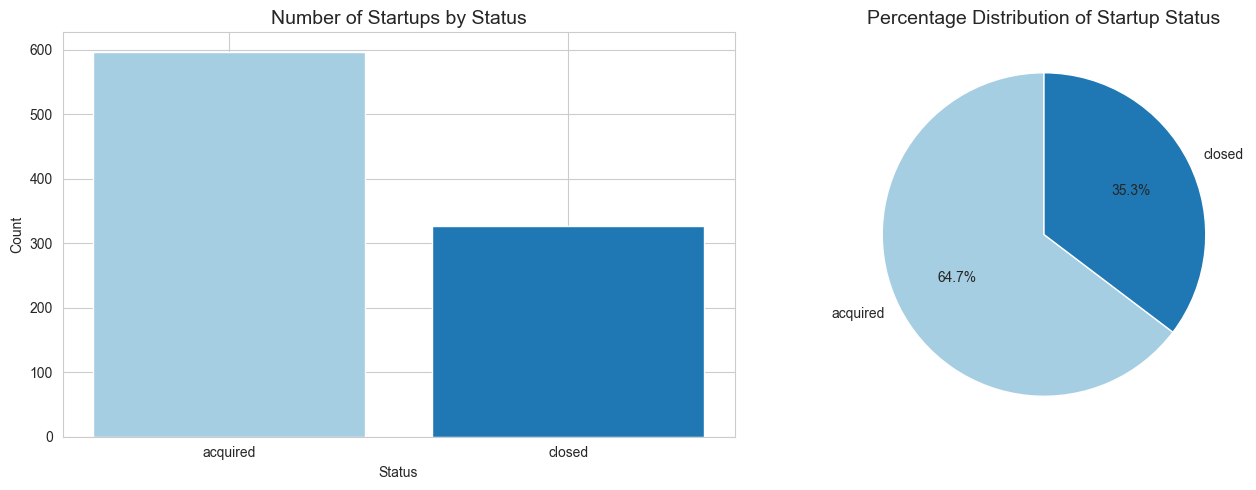

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Get colors from the palette
colors = sns.color_palette("Paired")

status_counts = df['status'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot - using colors from palette
axes[0].bar(status_counts.index, status_counts.values, color=colors)
axes[0].set_title('Number of Startups by Status', fontsize=14)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Status')

# Pie chart - using colors from palette
axes[1].pie(status_counts.values, labels=status_counts.index, 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Percentage Distribution of Startup Status', fontsize=14)

plt.tight_layout()
plt.show()

In [152]:
categorical_vars = [
    'state_code', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
    'category_code', 'is_top500',
    'has_VC', 'has_angel',
    'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD'
]

print("Frequency Analysis of Categorical Variables:")
for var in categorical_vars[:6]:  # Analyze first 6 in detail
    print(f"\n--- {var} ---")
    freq_table = df[var].value_counts()
    print(freq_table)
    
    # Success rate by category
    if var != 'state_code.1':  # Avoid duplicate
        for category in freq_table.index[:5]:  # Top 5 categories
            subset = df[df[var] == category]
            success_rate = (subset['status'] == 'acquired').mean() * 100
            print(f"{category}: {success_rate:.2f}% success rate")

# Success rates for binary categorical variables
binary_vars = ['has_VC', 'has_angel', 'is_top500', 
               'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']

print("\nSuccess Rates for Binary Variables:")
for var in binary_vars:
    success_rate_1 = df[df[var] == 1]['status'].apply(lambda x: 1 if x == 'acquired' else 0).mean() * 100
    success_rate_0 = df[df[var] == 0]['status'].apply(lambda x: 1 if x == 'acquired' else 0).mean() * 100
    print(f"{var}: 1 = {success_rate_1:.2f}%, 0 = {success_rate_0:.2f}%")

Frequency Analysis of Categorical Variables:

--- state_code ---
state_code
CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
DC      4
CT      4
TN      3
RI      3
UT      3
MI      3
MO      2
NH      2
KY      2
ME      2
NV      2
IN      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: count, dtype: int64
CA: 68.03% success rate
NY: 72.64% success rate
MA: 77.11% success rate
TX: 54.76% success rate
WA: 57.14% success rate

--- is_CA ---
is_CA
1    487
0    436
Name: count, dtype: int64
1: 68.17% success rate
0: 60.78% success rate

--- is_NY ---
is_NY
0    817
1    106
Name: count, dtype: int64
0: 63.65% success rate
1: 72.64% success rate

--- is_MA ---
is_MA
0    840
1     83
Name: count, dtype: int64
0: 63.45% success rate
1: 77.11% success rate

--- is_TX ---
is_TX
0    881
1     42
Name: count, dtype: int64
0: 65.15% success rate
1: 54.7

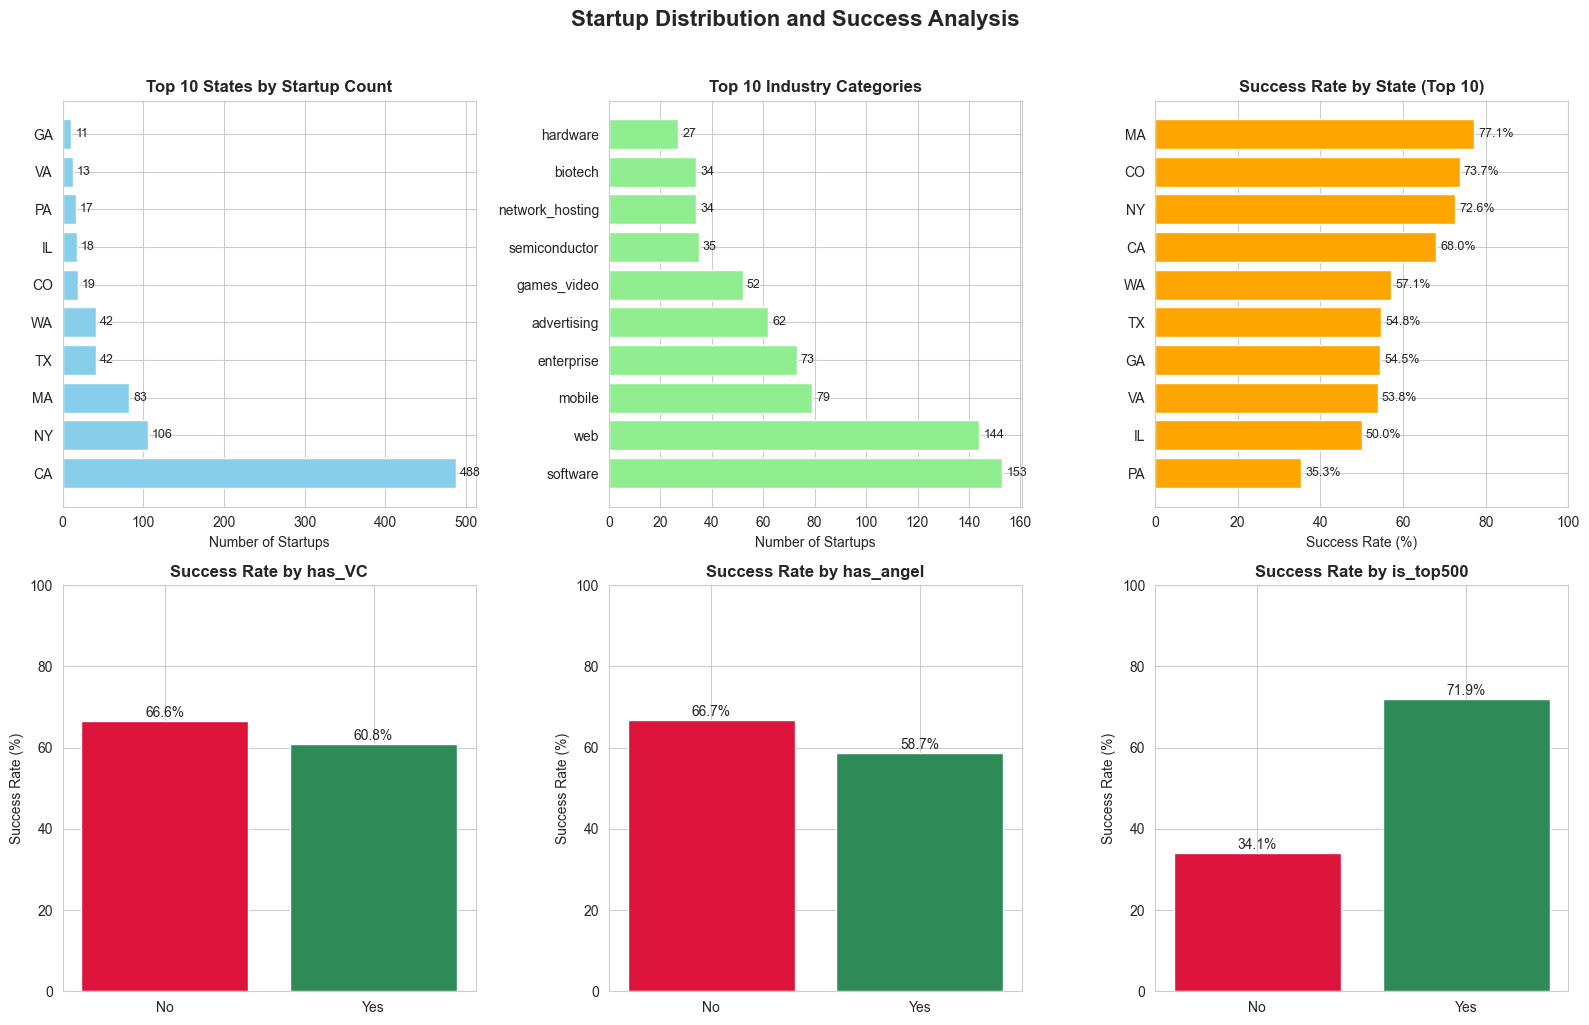

In [153]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # 2 rows, 3 columns

# Row 1: Three plots
# 1. State distribution (row 0, col 0)
state_counts = df['state_code'].value_counts().head(10)
axes[0, 0].barh(state_counts.index, state_counts.values, color='skyblue')
axes[0, 0].set_title('Top 10 States by Startup Count', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Startups', fontsize=10)

# Add value labels on bars
for i, (state, count) in enumerate(zip(state_counts.index, state_counts.values)):
    axes[0, 0].text(count + max(state_counts.values)*0.01, i, 
                   f'{count:,}', va='center', fontsize=9)

# 2. Industry category distribution (row 0, col 1)
category_counts = df['category_code'].value_counts().head(10)
axes[0, 1].barh(category_counts.index, category_counts.values, color='lightgreen')
axes[0, 1].set_title('Top 10 Industry Categories', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Startups', fontsize=10)

# Add value labels on bars
for i, (category, count) in enumerate(zip(category_counts.index, category_counts.values)):
    axes[0, 1].text(count + max(category_counts.values)*0.01, i, 
                   f'{count:,}', va='center', fontsize=9)

# 3. Success rate by state (top 10) (row 0, col 2)
top_states = df['state_code'].value_counts().head(10).index
state_success = {}
for state in top_states:
    state_data = df[df['state_code'] == state]
    success_rate = (state_data['status'] == 'acquired').mean() * 100
    state_success[state] = success_rate

# Sort by success rate
state_success = dict(sorted(state_success.items(), key=lambda x: x[1]))
axes[0, 2].barh(list(state_success.keys()), list(state_success.values()), 
                color='orange')
axes[0, 2].set_title('Success Rate by State (Top 10)', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Success Rate (%)', fontsize=10)
axes[0, 2].set_xlim(0, 100)  # Set consistent scale

# Add value labels on bars
for i, (state, rate) in enumerate(zip(state_success.keys(), state_success.values())):
    axes[0, 2].text(rate + 1, i, f'{rate:.1f}%', va='center', fontsize=9)

# Row 2: Two plots (spanning 2 columns for binary variables)
binary_vars_to_plot = ['has_VC', 'has_angel', 'is_top500']

# Create subplot grid for binary variables (2 columns in row 1)
for i, var in enumerate(binary_vars_to_plot[:2]):  # First 2 variables
    success_rates = []
    for value in [0, 1]:
        subset = df[df[var] == value]
        success_rate = (subset['status'] == 'acquired').mean() * 100
        success_rates.append(success_rate)
    
    axes[1, i].bar(['No', 'Yes'], success_rates, color=['#DC143C', '#2E8B57'])
    axes[1, i].set_title(f'Success Rate by {var}', fontsize=12, fontweight='bold')
    axes[1, i].set_ylabel('Success Rate (%)', fontsize=10)
    axes[1, i].set_ylim(0, 100)
    
    # Add value labels on bars
    for j, rate in enumerate(success_rates):
        axes[1, i].text(j, rate + 1, f'{rate:.1f}%', ha='center', fontsize=10)

# Third binary variable goes in last column of row 2 (make it centered)
var = binary_vars_to_plot[2]
success_rates = []
for value in [0, 1]:
    subset = df[df[var] == value]
    success_rate = (subset['status'] == 'acquired').mean() * 100
    success_rates.append(success_rate)

axes[1, 2].bar(['No', 'Yes'], success_rates, color=['#DC143C', '#2E8B57'])
axes[1, 2].set_title(f'Success Rate by {var}', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Success Rate (%)', fontsize=10)
axes[1, 2].set_ylim(0, 100)

# Add value labels on bars
for j, rate in enumerate(success_rates):
    axes[1, 2].text(j, rate + 1, f'{rate:.1f}%', ha='center', fontsize=10)

plt.suptitle('Startup Distribution and Success Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [154]:
# key quantitative variables
quantitative_vars = [
    'age_first_funding_year', 'age_last_funding_year',
    'funding_total_usd', 'funding_rounds',
    'milestones', 'relationships',
    'avg_participants'
]

print("Descriptive Statistics for Quantitative Variables:")
print(df[quantitative_vars].describe())

# Additional statistics by status
print("\nDescriptive Statistics by Startup Status:")
for var in quantitative_vars:
    print(f"\n--- {var} ---")
    print("Success (acquired):")
    print(df[df['status'] == 'acquired'][var].describe())
    print("\nFailure (closed):")
    print(df[df['status'] == 'closed'][var].describe())

Descriptive Statistics for Quantitative Variables:
       age_first_funding_year  age_last_funding_year  funding_total_usd  \
count              923.000000             923.000000       9.230000e+02   
mean                 2.235630               3.931456       2.541975e+07   
std                  2.510449               2.967910       1.896344e+08   
min                 -9.046600              -9.046600       1.100000e+04   
25%                  0.576700               1.669850       2.725000e+06   
50%                  1.446600               3.528800       1.000000e+07   
75%                  3.575350               5.560250       2.472500e+07   
max                 21.895900              21.895900       5.700000e+09   

       funding_rounds  milestones  relationships  avg_participants  
count      923.000000  923.000000     923.000000        923.000000  
mean         2.310943    1.841820       7.710726          2.838586  
std          1.390922    1.322632       7.265776          1.874601

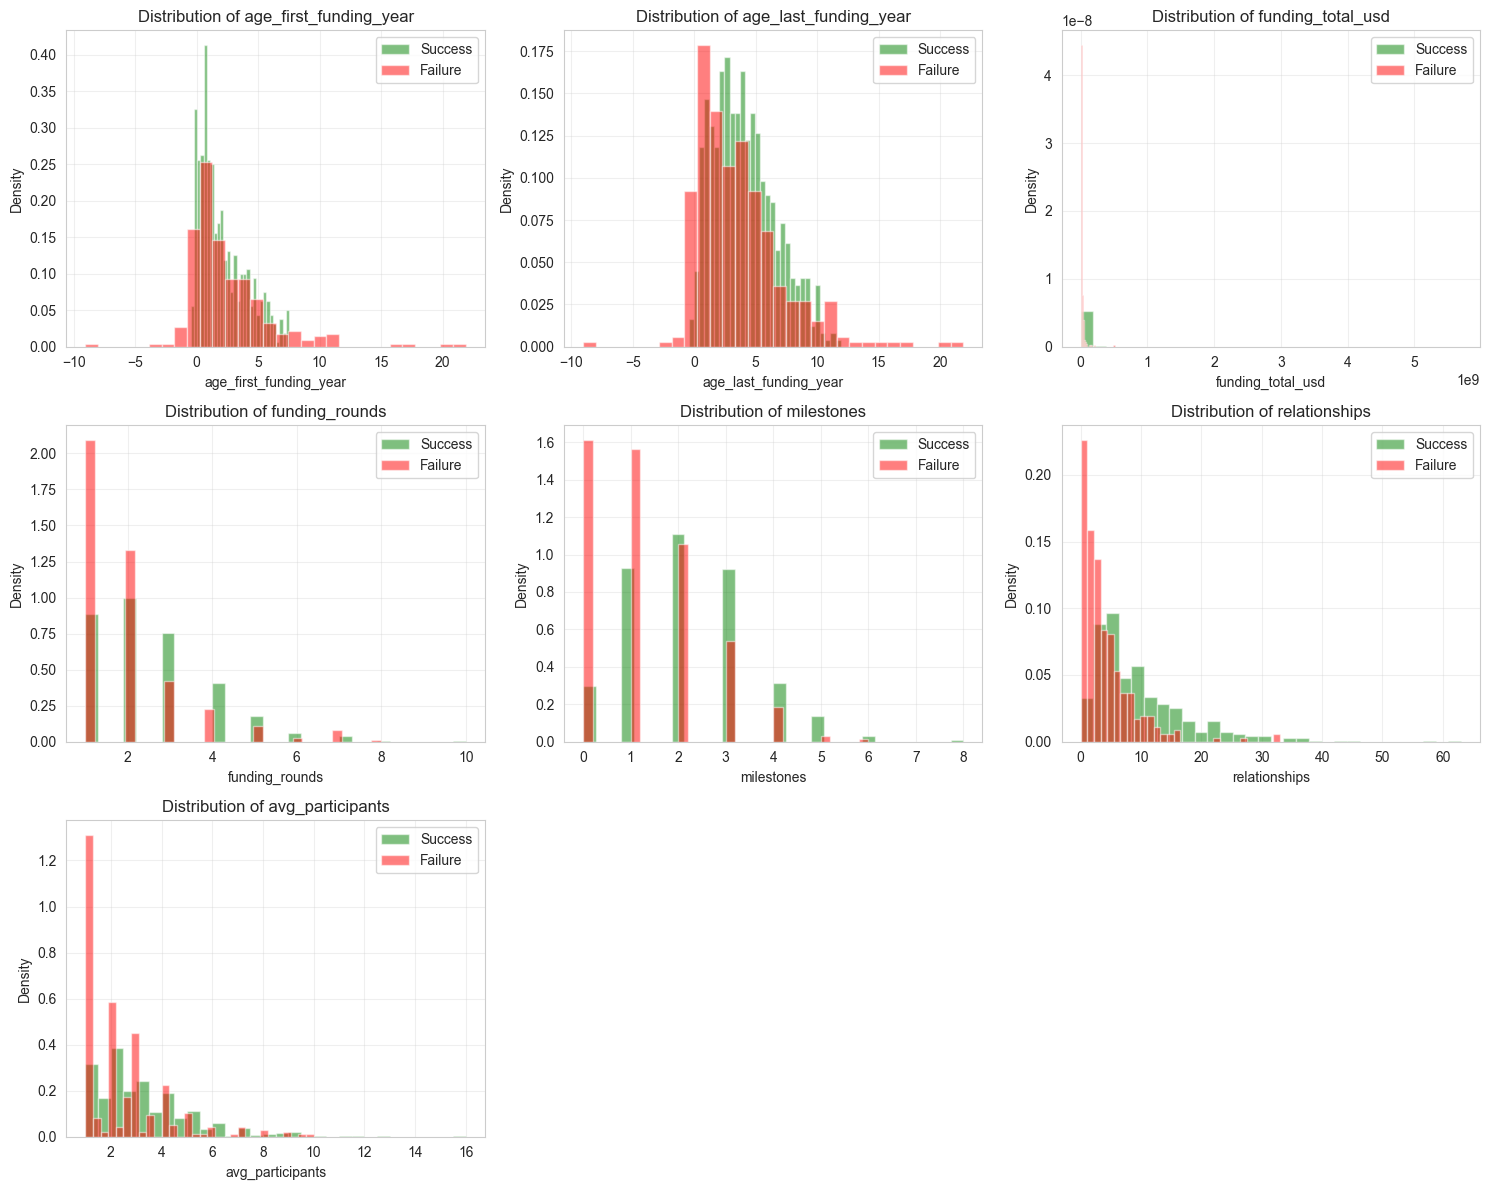

In [155]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(quantitative_vars[:7]):
    # Success vs Failure comparison
    success_data = df[df['status'] == 'acquired'][var].dropna()
    failure_data = df[df['status'] == 'closed'][var].dropna()
    
    # Histogram with KDE
    axes[i].hist(success_data, bins=30, alpha=0.5, color='green', 
                 label='Success', density=True)
    axes[i].hist(failure_data, bins=30, alpha=0.5, color='red', 
                 label='Failure', density=True)
    axes[i].set_title(f'Distribution of {var}', fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(quantitative_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [156]:
# Let's look at percentage of missing values

print("Percentage of missing values in 'closed_at' column: % {:.2f}". format((df.closed_at.isnull().sum())/len(df)*100))
print("Percentage of missing values in 'Unnamed: 6' column: % {:.2f}". format((df["Unnamed: 6"].isnull().sum())/len(df)*100))
print("Percentage of missing values in 'age_last_milestone_year' column  : % {:.2f}". format((df.age_last_milestone_year.isnull().sum())/len(df)*100))
print("percentage of missing values in 'age_first_milestone_year' column : % {:.2f}". format((df.age_first_milestone_year.isnull().sum())/len(df)*100))

Percentage of missing values in 'closed_at' column: % 63.71
Percentage of missing values in 'Unnamed: 6' column: % 53.41
Percentage of missing values in 'age_last_milestone_year' column  : % 16.47
percentage of missing values in 'age_first_milestone_year' column : % 16.47


In [157]:
#  "Unnamed: 6", "Unnamed: 0", "id", "closed_at" columns are not necessary so drop it
df.drop(["Unnamed: 6"],axis=1, inplace=True)
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.drop(["id"], axis=1, inplace=True)
df.drop(["closed_at"], axis=1, inplace=True)

In [158]:
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

# "state_code" column and "state_code.1" column must be the same, so we should drop the "state_code.1" and also, 
# "state_code.1" column has a one missing value in the 515. row.

515 CA nan


In [159]:
df.drop(["state_code.1"], axis=1, inplace=True)

In [160]:
# "status_closed" column is for prediction of startup success and this is binary classification so we should convert numerical variable
df['success'] = (df['status'] == 'acquired').astype(int)

In [161]:
# Year columns must be converted to datetime type

df.founded_at=pd.to_datetime(df.founded_at)
df.first_funding_at=pd.to_datetime(df.first_funding_at)
df.last_funding_at=pd.to_datetime(df.last_funding_at)

In [162]:
import numpy as np

In [163]:
# we must get the absolute value of columns including negative value

df["age_first_funding_year"]=np.abs(df["age_first_funding_year"])
df["age_last_funding_year"]=np.abs(df["age_last_funding_year"])
df["age_first_milestone_year"]=np.abs(df["age_first_milestone_year"])
df["age_last_milestone_year"]=np.abs(df["age_last_milestone_year"])

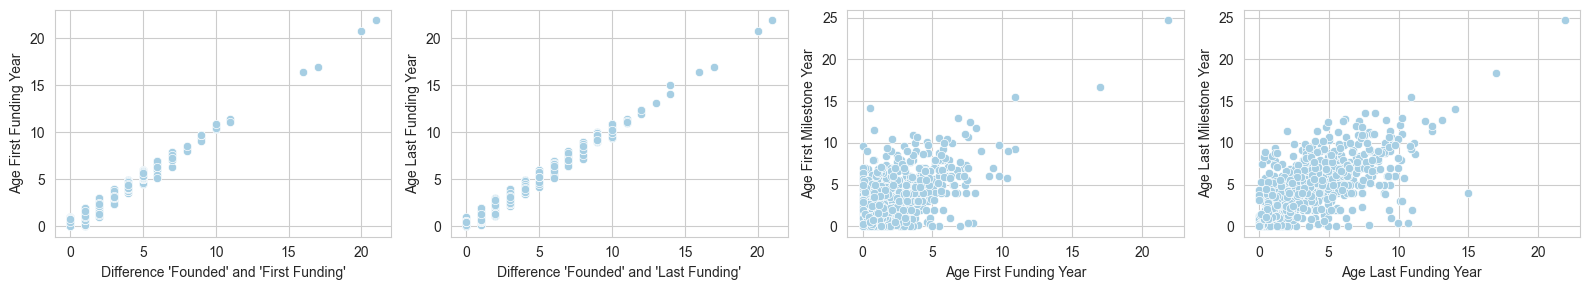

In [164]:
plt.figure(figsize=(16, 3), dpi=100)

# 1. Difference between Founded and First Funding vs age_first_funding_year
plt.subplot(1, 4, 1)
sns.scatterplot(x=np.abs(df["first_funding_at"].dt.year - df["founded_at"].dt.year), 
                y=df["age_first_funding_year"])
plt.xlabel("Difference 'Founded' and 'First Funding'")
plt.ylabel("Age First Funding Year")

# 2. Difference between Founded and Last Funding vs age_last_funding_year
plt.subplot(1, 4, 2)
sns.scatterplot(x=np.abs(df["last_funding_at"].dt.year - df["founded_at"].dt.year), 
                y=df["age_last_funding_year"])
plt.xlabel("Difference 'Founded' and 'Last Funding'")
plt.ylabel("Age Last Funding Year")

# 3. Age First Funding Year vs Age First Milestone Year
plt.subplot(1, 4, 3)
sns.scatterplot(x=df["age_first_funding_year"], 
                y=df["age_first_milestone_year"])
plt.xlabel("Age First Funding Year")
plt.ylabel("Age First Milestone Year")

# 4. Age Last Funding Year vs Age Last Milestone Year
plt.subplot(1, 4, 4)
sns.scatterplot(x=df["age_last_funding_year"], 
                y=df["age_last_milestone_year"])
plt.xlabel("Age Last Funding Year")
plt.ylabel("Age Last Milestone Year")

plt.tight_layout()
plt.show()

In [165]:
# fill the missing values by mean() function

df["age_first_milestone_year"] = df["age_first_milestone_year"].fillna((df["age_first_milestone_year"].mean()))
df["age_last_milestone_year"] = df["age_last_milestone_year"].fillna((df["age_last_milestone_year"].mean()))

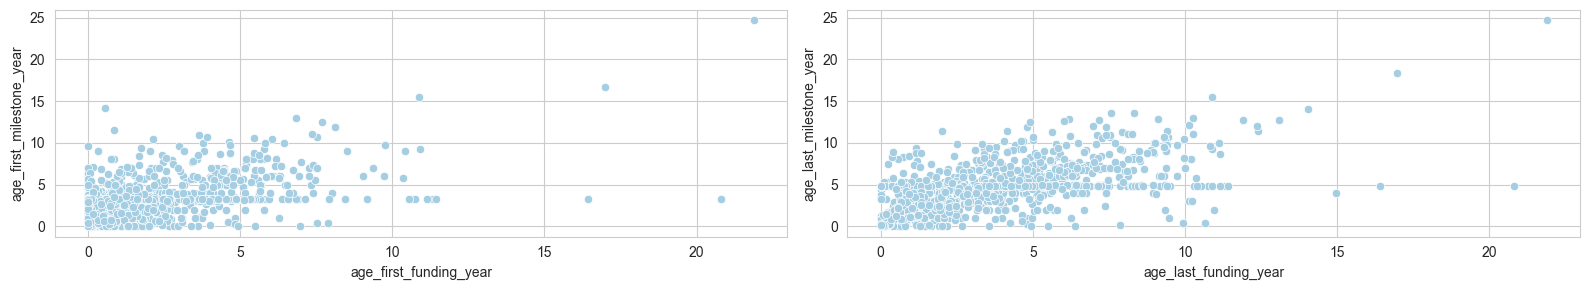

In [166]:
# visualize relationships

plt.figure(figsize=(16, 3), dpi=100)

plt.subplot(1, 2, 1)
sns.scatterplot(x=df["age_first_funding_year"], 
                y=df["age_first_milestone_year"])

plt.subplot(1, 2, 2)
sns.scatterplot(x=df["age_last_funding_year"], 
                y=df["age_last_milestone_year"])

plt.tight_layout()
plt.show()

In [167]:
df.describe()

,latitude,longitude,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,success
count,923.000000,923.000000,923.000000,923,923,923,923.000000,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,38.517442,-103.539212,0.646804,2005-09-10 00:57:43.488624128,2007-12-05 01:05:31.527627264,2009-08-15 00:31:12.156013056,2.304274,3.963252,3.227575,4.817909,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
min,25.752358,-122.756956,0.000000,1984-01-01 00:00:00,2000-01-01 00:00:00,2001-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,37.388869,-122.198732,0.000000,2003-01-01 00:00:00,2006-03-01 00:00:00,2008-01-01 00:00:00,0.593150,1.736950,1.349300,2.969850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,37.779281,-118.374037,1.000000,2006-01-01 00:00:00,2007-09-01 00:00:00,2009-12-16 00:00:00,1.471200,3.545200,3.227575,4.817909,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,40.730646,-77.214731,1.000000,2008-04-01 00:00:00,2009-11-01 00:00:00,2011-04-29 00:00:00,3.583550,5.561600,4.002700,6.058900,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,59.335232,18.057121,1.000000,2013-04-16 00:00:00,2013-11-20 00:00:00,2013-11-20 00:00:00,21.895900,21.895900,24.684900,24.684900,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000
std,3.741497,22.394167,0.478222,NaN,NaN,NaN,2.447524,2.925268,2.548902,2.847542,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222


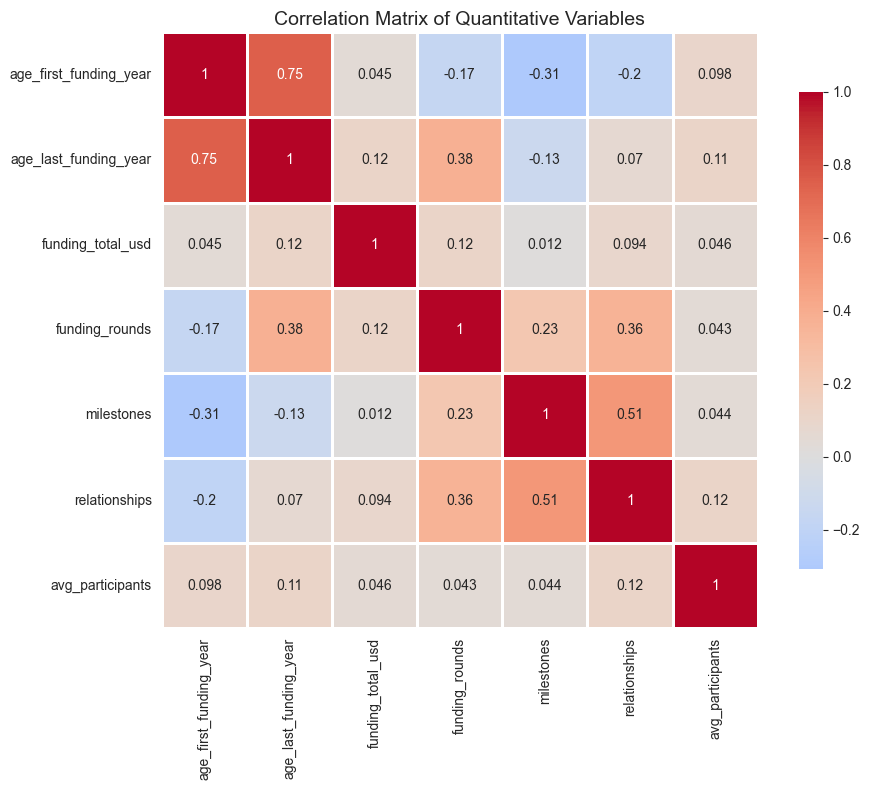

Top Positive Correlations:
age_first_funding_year - age_last_funding_year: 0.752
milestones - relationships: 0.514
age_last_funding_year - funding_rounds: 0.382
funding_rounds - relationships: 0.359
funding_rounds - milestones: 0.230


In [168]:
# Calculate correlation matrix
corr_matrix = df[quantitative_vars].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Quantitative Variables', fontsize=14)
plt.tight_layout()
plt.show()

# Top correlations
print("Top Positive Correlations:")
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
top_pairs = [(i, j, corr_pairs[(i, j)]) 
             for i, j in corr_pairs.index 
             if i != j and i < j]
for pair in top_pairs[:5]:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

In [202]:
# VIF analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select predictors to check
predictors_to_check = ['age_first_funding_year', 'age_last_funding_year', 
                       'milestones', 'relationships', 'funding_rounds', 
                       'funding_total_usd', 'has_VC', 'is_top500', 'avg_participants']

# Filter to existing columns
existing_predictors = [p for p in predictors_to_check if p in df.columns]

# Prepare data
X = df[existing_predictors].copy().fillna(0)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF
vif_data = vif_data.sort_values("VIF", ascending=False)

print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data.to_string(index=False))

Variance Inflation Factor (VIF) Analysis:
              Variable       VIF
 age_last_funding_year 16.089440
        funding_rounds  8.745852
age_first_funding_year  8.398782
             is_top500  5.741510
            milestones  3.816687
      avg_participants  3.552745
         relationships  3.305159
                has_VC  1.855674
     funding_total_usd  1.044150


In [213]:
from sklearn.model_selection import train_test_split

predictors = [
    'funding_total_usd',      # VIF = 1.04 (very clean)
    'has_VC',                 # VIF = 1.85 (clean)
    'is_top500',              # VIF = 4.62 (acceptable)
    'milestones',             # VIF = 3.80 (acceptable)
    'avg_participants',       # VIF = 3.55 (acceptable) 
    'age_first_funding_year'  # VIF = 8.13 (highest, but needed for timing)
    ]

# Prepare data for Model 1
X_basic = df[predictors].copy()
y = df['success'].copy()

# Handle missing values
X_basic = X_basic.fillna(X_basic.median())

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_basic, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training success rate: {y_train.mean()*100:.2f}%")
print(f"Test success rate: {y_test.mean()*100:.2f}%")

Training set size: 646
Test set size: 277
Training success rate: 64.71%
Test success rate: 64.62%


In [214]:
from sklearn.metrics import classification_report, roc_auc_score
import statsmodels.api as sm

# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit logistic regression
model1_sm = sm.Logit(y_train, X_train_sm)
result1 = model1_sm.fit()

print("Logistic Regression (5 predictors)")
print("\nPredictors:")
for i, predictor in enumerate(predictors):
    print(f"  {i+1}. {predictor}")


Optimization terminated successfully.
         Current function value: 0.542001
         Iterations 8
Logistic Regression (5 predictors)

Predictors:
  1. funding_total_usd
  2. has_VC
  3. is_top500
  4. milestones
  5. avg_participants
  6. age_first_funding_year


In [215]:
print("Log regression results (Statsmodels):")
print(result1.summary())

Log regression results (Statsmodels):
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                  646
Model:                          Logit   Df Residuals:                      639
Method:                           MLE   Df Model:                            6
Date:                Fri, 05 Dec 2025   Pseudo R-squ.:                  0.1652
Time:                        00:15:21   Log-Likelihood:                -350.13
converged:                       True   LL-Null:                       -419.41
Covariance Type:            nonrobust   LLR p-value:                 2.014e-27
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.7426      0.286     -6.095      0.000      -2.303      -1.182
funding_total_usd       3.039e-09   3.27e-09      0.930  

In [216]:
# Calculate odds ratios
odds_ratios = pd.DataFrame({
    'predictor': ['const'] + predictors,
    'coef': result1.params,
    'std_err': result1.bse,
    'z_value': result1.tvalues,
    'p_value': result1.pvalues,
    'odds_ratio': np.exp(result1.params)
})

print("Odds rations interpretation")
print("\nFor each unit increase in predictor, the odds of success change by:")
for i, row in odds_ratios.iterrows():
    if row['predictor'] != 'const':
        change = (row['odds_ratio'] - 1) * 100
        significance = "***" if row['p_value'] < 0.001 else "**" if row['p_value'] < 0.01 else "*" if row['p_value'] < 0.05 else ""
        print(f"  {row['predictor']}: {change:+.1f}% {significance}")

Odds rations interpretation

For each unit increase in predictor, the odds of success change by:
  funding_total_usd: +0.0% 
  has_VC: -20.5% 
  is_top500: +243.4% ***
  milestones: +78.5% ***
  avg_participants: +18.6% **
  age_first_funding_year: -3.6% 


In [217]:

# Make predictions
X_test_sm = sm.add_constant(X_test)
y_pred_prob = result1.predict(X_test_sm)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = (y_pred == y_test).mean()
roc_auc = roc_auc_score(y_test, y_pred_prob)


print("Model performance of test set")
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Failure', 'Success']))

Model performance of test set
Accuracy: 0.715
ROC-AUC: 0.736

Classification Report:
              precision    recall  f1-score   support

     Failure       0.62      0.50      0.55        98
     Success       0.75      0.83      0.79       179

    accuracy                           0.71       277
   macro avg       0.69      0.67      0.67       277
weighted avg       0.71      0.71      0.71       277



### Model Fit Statistics
`Pseudo R2 = 0.1652`: Model explains 16.5% of variance in startup success

Significant Model: `LLR p-value = 2.014e-27` (highly significant)

Convergence: Successful in 8 iterations

Baseline Comparison: LL improved from -419.41 (null) to -350.13 (model)

**Interpretation:** The model is statistically significant but has moderate explanatory power. This is typical for business/social science data where many unmeasurable factors (team dynamics, market timing, luck) affect outcomes.

### Model Performance
**Accuracy**
- `Accuracy = 71.5%`
- Baseline: Randomly guessing "success" would yield 64.6% accuracy
- Improvement: Model provides 6.9% improvement over baseline. Acceptable but not excellent

**ROC-AUC**
- `ROC-AUC = 0.736`
- Model has 73.6% chance of correctly ranking a random successful startup higher than a random failed one

### Significant Predictors

**1. is_top500**
- `Coefficient: 1.2336, p < 0.001`
- `Odds Ratio: e^1.2336 = 3.434`
- **Interpretation:** 243.4% increase in odds
- **Business Meaning:** Top 500 recognition is the strongest predictor of success
- Startups in top 500 lists have 3.4x higher odds of success
- Practical Implication: Market validation and visibility matter tremendously

**2. milestones**
- `Coefficient: 0.5796, p < 0.001`
- `Odds Ratio: e^0.5796 = 1.785`
- **Interpretation:** 78.5% increase in odds per milestone
- **Business Meaning:** Execution capability is critical
- Each additional milestone increases success odds by 78.5%
- **Practical Implication:** Focus on achieving tangible milestones

**3. avg_participants**
- `Coefficient: 0.1704, p = 0.005`
- `Odds Ratio: e^0.1704 = 1.186`
- **Interpretation:** 18.6% increase in odds per participant
- **Business Meaning:** Investor syndicate size matters
- Each additional average participant increases odds by 18.6%
- **Practical Implication:** Broader investor interest signals validation

### Hypotheses testing results
**Funding amount**
- H1: Startups with higher total funding amounts are more likely to succeed
- Rejecting H1 - no statistically significant relationship between funding amount and success when controlling for other factors
- `Coefficient: 3.039e-09 (essentially zero)`
- `p-value: 0.352 (> 0.05)`
- **Interpretation:** Funding amount alone doesn't predict success; it's what you do with the money that matters

**Funding Amount Hypothesis**
- H1: Startups with higher total funding amounts are more likely to succeed
- Reject H1 - no statistically significant relationship
- `Coefficient: 3.039e-09 (essentially zero)`
- `p-value: 0.352 (> 0.05)`
- `Odds Ratio: ~1.000 (0.0% change)`
- **Interpretation:** Funding amount alone doesn't predict success - it's what you do with the money that matters

**Milestone Hypothesis**
- H1: Startups achieving more milestones have a higher probability of success
- **Result:** Strongly support H1 (Reject H₀)
- `Coefficient: 0.5796` (positive and significant)
- `p-value: < 0.001` (highly significant)
- `Odds Ratio: 1.785` (78.5% increase per milestone)
- **Interpretation:** Each milestone significantly increases success odds; execution capability is critical

**Geographical Hypothesis**
- H1: Startups based in major startup hubs (CA, NY, MA, TX) are more likely to succeed
- **Result:** Not tested in current model
- **Recommendation:** Requires separate analysis with location variables

**Investment Stage Hypothesis**
- H1: Startups securing later-stage funding (Round C/D) are more likely to succeed
- **Result:** Not directly tested
- **Indirect evidence:** avg_participants shows investor syndicate size matters
- **Recommendation:** Include has_roundC and has_roundD variables

**Industry Hypothesis**
- H1: Startups in technology-driven sectors have higher success rates
- **Result:** Not tested in current model
- **Recommendation:** Add industry dummies or category_code analysis

**Investor Type Hypothesis**
- H1: Startups backed by venture capital are more likely to succeed
- **Result:** Reject H1 - no significant relationship
- `Coefficient: -0.2297` (negative direction)
- `p-value: 0.250 (> 0.05)`
- `Odds Ratio: 0.795` (20.5% decrease, but not significant)
- **Interpretation:** VC backing alone doesn't guarantee success when controlling for other factors

**Top 500 Hypothesis**
- H1: Startups listed as "top 500" are more likely to succeed
- **Result:** Strongly support H1 (Reject H₀)
- Coefficient: 1.2336 (largest positive effect)
- `p-value: < 0.001 `(highly significant)
- `Odds Ratio: 3.434` (243.4% increase)
- **Interpretation:** Top 500 status is the strongest predictor of success; market validation is critical

**Funding Speed Hypothesis**
- H1: Startups with shorter intervals between founding and first funding are more likely to succeed
- **Result:** Reject H1 - no significant relationship
- Coefficient: -0.0368 (negative but small)
- `p-value: 0.333` (> 0.05)
- `Odds Ratio: 0.964` (3.6% decrease per year, not significant)
- **Interpretation:** Timing of first funding matters less than execution after funding

**Network Hypothesis**
- H1: Startups with more relationships have higher success rates
- **Result:** Partially supported through proxy variable
- **Proxy evidence:** avg_participants is significant (p=0.005)
- `Odds Ratio for avg_participants: 1.186 `(18.6% increase per participant)
- **Interpretation:** Investor network size matters, but general relationships not tested

**Operational Longevity Hypothesis**
- H1: Startups that achieve first milestone sooner are more likely to succeed
- **Result:** Not directly tested
- **Related finding:** milestones (total count) is highly significant
- **Interpretation:** Milestone achievement matters, but timing of first milestone not tested

### General conclusions
The study challenges several conventional wisdoms in startup investing:
- **Capital is not king:** Total funding amount shows no statistically significant relationship with success when controlling for other factors. This contradicts the common belief that "more funding equals higher success.
- **VC backing is not a silver bullet:** Venture capital investment alone does not guarantee success. In fact, the model shows a negative (though insignificant) relationship, suggesting that VC-backed startups may face higher expectations or undertake riskier ventures.
- **Speed to funding is overrated:** The timing of first funding does not significantly impact success outcomes, shifting focus from fundraising speed to execution quality.

  
**Primary Determinants of Startup Success:**

> **A. Market Validation is Paramount**

- Top 500 status emerges as the strongest predictor (243% increase in odds)
- External recognition and market validation matter more than internal metrics
- Implication: Startups should prioritize credibility-building and market positioning

> **B. Execution Excellence is Non-Negotiable**

- Each additional milestone increases success odds by 78.5%
- Consistent execution trumps initial funding and timing advantages
- Implication: Focus on delivering tangible results and measurable progress

> **C. Investor Syndicate Quality Matters**

- Average number of participants shows significant positive impact (18.6% increase per participant)
- Implication: Broad investor interest signals validation; avoid over-reliance on single investors